In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [6]:
#Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [7]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [8]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


<AxesSubplot:xlabel='Work.Experience'>

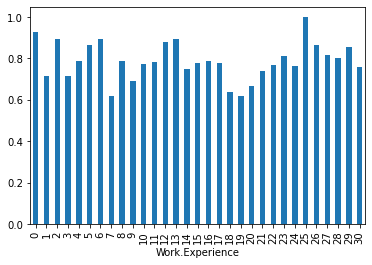

In [9]:
df.groupby('Work.Experience').TaxInc_Good.mean().plot(kind='bar')

<AxesSubplot:xlabel='Undergrad_YES'>

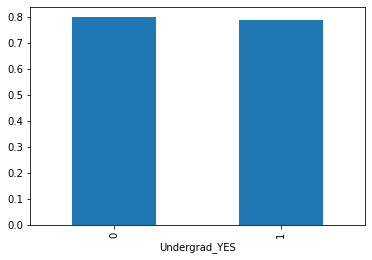

In [10]:
df.groupby('Undergrad_YES').TaxInc_Good.mean().plot(kind='bar')

<AxesSubplot:xlabel='Marital.Status_Married'>

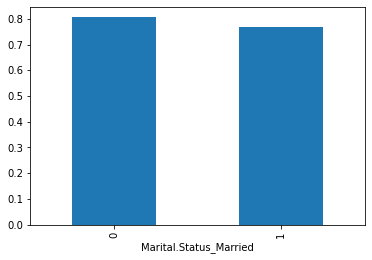

In [11]:
df.groupby('Marital.Status_Married').TaxInc_Good.mean().plot(kind='bar')

<AxesSubplot:xlabel='Marital.Status_Single'>

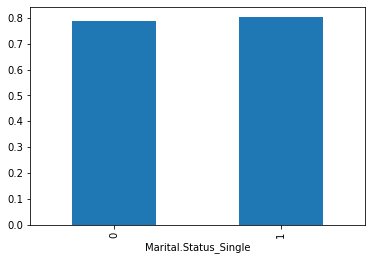

In [12]:
df.groupby('Marital.Status_Single').TaxInc_Good.mean().plot(kind='bar')

<AxesSubplot:xlabel='Urban_YES'>

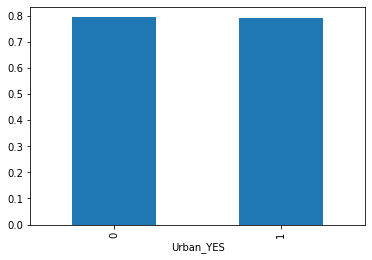

In [13]:
df.groupby('Urban_YES').TaxInc_Good.mean().plot(kind='bar')

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [10]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Choosing RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [14]:
# Creating new model testing with new parameters
forest_new = RF(n_estimators=100,max_depth=3,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=3, min_samples_split=20)

In [15]:
forest_new.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=1822756813),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=711063684),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=1289694894),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=853957316),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=1903400144),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=182905612),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
                        random_state=1474381526),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=20,
             

In [16]:
len (forest_new.estimators_)

100

[Text(313.875, 475.65000000000003, 'X[0] <= 0.006\ngini = 0.379\nsamples = 301\nvalue = [122, 358]'),
 Text(209.25, 339.75, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(418.5, 339.75, 'X[0] <= 0.198\ngini = 0.376\nsamples = 300\nvalue = [120, 358]'),
 Text(209.25, 203.85000000000002, 'X[0] <= 0.07\ngini = 0.254\nsamples = 57\nvalue = [13, 74]'),
 Text(104.625, 67.94999999999999, 'gini = 0.397\nsamples = 22\nvalue = [9, 24]'),
 Text(313.875, 67.94999999999999, 'gini = 0.137\nsamples = 35\nvalue = [4, 50]'),
 Text(627.75, 203.85000000000002, 'X[1] <= 0.817\ngini = 0.398\nsamples = 243\nvalue = [107, 284]'),
 Text(523.125, 67.94999999999999, 'gini = 0.425\nsamples = 190\nvalue = [94, 213]'),
 Text(732.375, 67.94999999999999, 'gini = 0.262\nsamples = 53\nvalue = [13, 71]')]

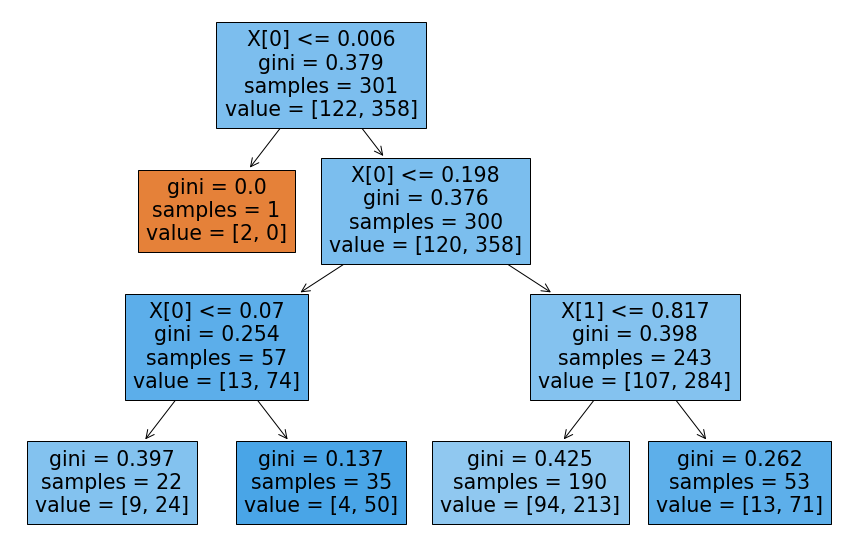

In [17]:
plt.figure (figsize = (15,10))
tree.plot_tree (forest_new.estimators_[1], filled = True)

In [18]:
print('Train accuracy: {}'.format(forest_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest_new.score(Xtest, ytest)))

Train accuracy: 0.79375
Test accuracy: 0.7916666666666666
